# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Flatten

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

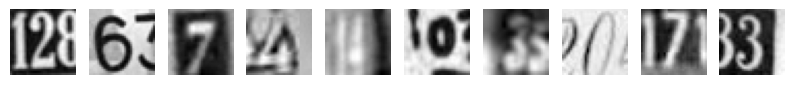

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data.**

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def nn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(64, activation = 'relu', input_shape = (1024,)))

    model.add(Dense(32, activation = 'relu'))

    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

    # Compile the model

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

    return model

In [ ]:
# Build the model

model_1 = nn_model_1()

In [ ]:
# Print the summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model

history_model_1 = model_1.fit(X_train, y_train, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 128)

Epoch 1/20
263/263 [==============================] - 3s 4ms/step - loss: 2.3002 - accuracy: 0.1159 - val_loss: 2.2677 - val_accuracy: 0.1632
Epoch 2/20
263/263 [==============================] - 1s 3ms/step - loss: 2.1662 - accuracy: 0.2041 - val_loss: 2.0418 - val_accuracy: 0.2729
Epoch 3/20
263/263 [==============================] - 1s 3ms/step - loss: 1.8570 - accuracy: 0.3546 - val_loss: 1.6774 - val_accuracy: 0.4438
Epoch 4/20
263/263 [==============================] - 1s 3ms/step - loss: 1.5812 - accuracy: 0.4741 - val_loss: 1.4876 - val_accuracy: 0.5174
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 1.4484 - accuracy: 0.5282 - val_loss: 1.4190 - val_accuracy: 0.5329
Epoch 6/20
263/263 [==============================] - 1s 3ms/step - loss: 1.3748 - accuracy: 0.5555 - val_loss: 1.3582 - val_accuracy: 0.5563
Epoch 7/20
263/263 [==============================] - 1s 3ms/step - loss: 1.3219 - accuracy: 0.5780 - val_loss: 1.2999 - val_accuracy: 0.5930
Epoch 

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

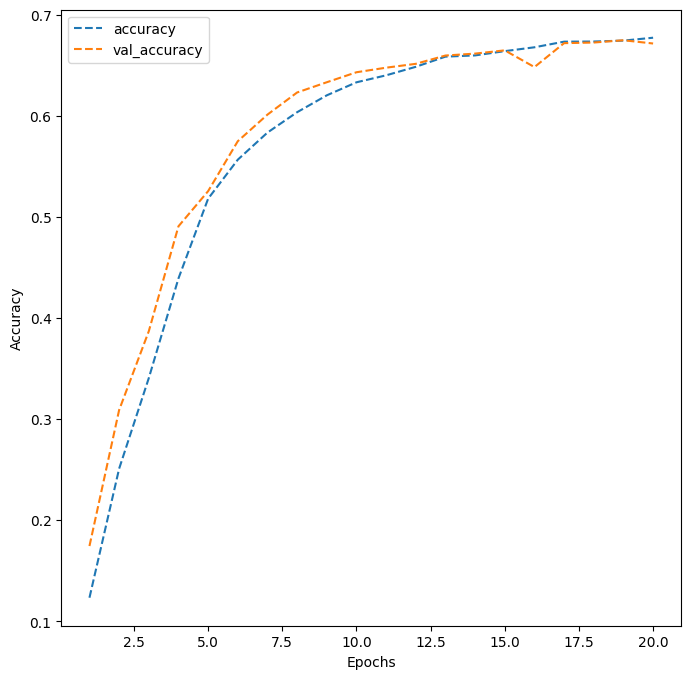

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: accuracy convergence near 12.5 epochs, with a divergence at 16 epochs and then convergence again at 17 epochs. decreasing growth starting at 7.5 epochs with a gain of 0.5 in accuracy over the subsequent 12.5 epochs. Maximum accuracy at 20 epochs (train 0.677, val 0.675)**

## Plotting Loss

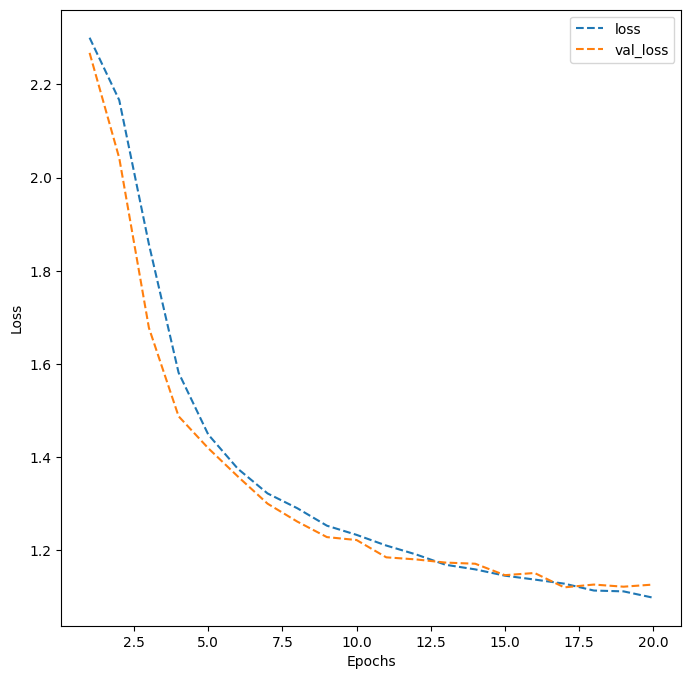

In [ ]:
# Plotting the loss

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, dict_hist['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## 20 Epoch ANN Vis

In [ ]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 20.4 MB/s eta 0:00:00


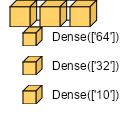

In [ ]:
from PIL import ImageFont

import visualkeras

font = ImageFont.truetype("usr/share/fonts/truetype/arial.ttf", 12)

visualkeras.layered_view(model_1, legend = True, show_dimension = True, font = font, to_file = 'Model 1 V1.png')

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def nn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(256, activation = 'relu', input_shape = (1024,)))

    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64, activation = 'relu'))

    model.add(Dense(64, activation = 'relu'))

    model.add(Dense(32, activation = 'relu'))

    model.add(BatchNormalization())

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    optimizer = Adam(learning_rate = 0.0005)

    model.compile(optimizer = optimizer, loss = categorical_crossentropy, metrics = ['accuracy'])

    return model

In [ ]:
# Build the model

model_2 = nn_model_2()

In [ ]:
# Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
# Fit the model

history_model_2 = model_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 [==============================] - 5s 6ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3012 - val_accuracy: 0.1063
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 2.1623 - accuracy: 0.1822 - val_loss: 2.0342 - val_accuracy: 0.2813
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.6004 - accuracy: 0.4525 - val_loss: 1.4579 - val_accuracy: 0.5364
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.3248 - accuracy: 0.5640 - val_loss: 1.1538 - val_accuracy: 0.6349
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1890 - accuracy: 0.6137 - val_loss: 1.1096 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1218 - accuracy: 0.6395 - val_loss: 1.0616 - val_accuracy: 0.6614
Epoch 

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

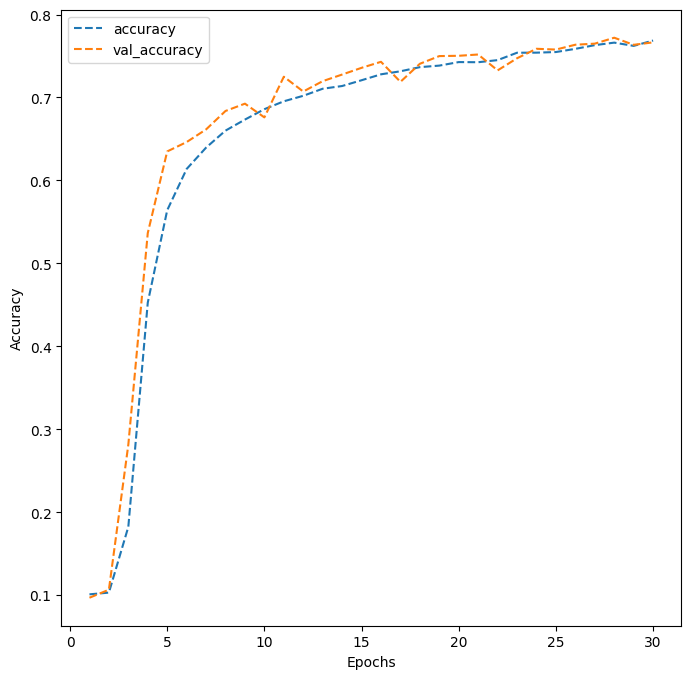

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: Accuracy increased from 0.68 in previous model to 0.771 train (0.762 val). Convergence at 10 epochs btw train and val. decreasing growth starting at 10 epochs with a gain in accuracy of ~0.8 over the following 20 epochs.**

## Plotting Loss

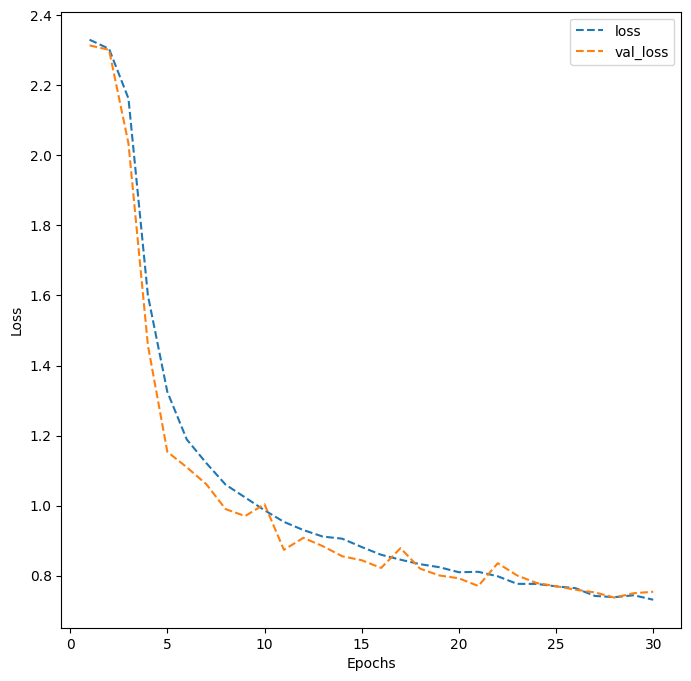

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, dict_hist['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1814
           1       0.73      0.83      0.78      1828
           2       0.88      0.73      0.80      1803
           3       0.78      0.69      0.73      1719
           4       0.74      0.85      0.79      1812
           5       0.68      0.77      0.72      1768
           6       0.69      0.81      0.75      1832
           7       0.88      0.76      0.81      1808
           8       0.74      0.71      0.73      1812
           9       0.80      0.72      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



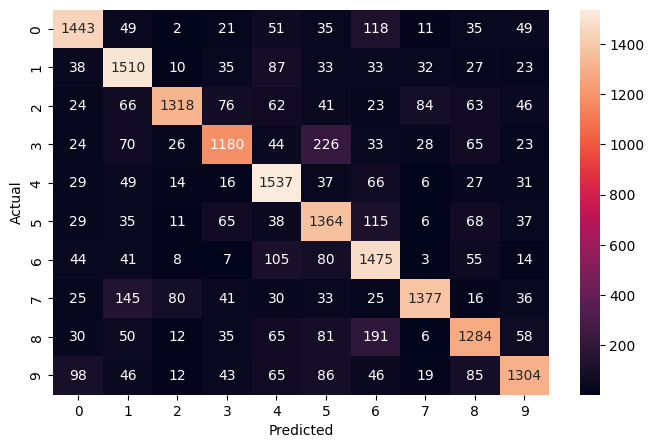

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

actual = y_test

predicted = test_pred

print(classification_report(actual, predicted))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(actual, predicted)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations: Overall poor fitting, with misclassifications of each number as every other number. Worst recall in identification of number 8, most frequently misidentified as number 5 or 6. Best recall for numbers 1 and 7 at 0.81, although number 1 was misidentified as number 7 90x and 7 was misidentified as number 2 121x. Precision highest for number 0, indicating ... and lowest for number 9, indicating ...**

## 30 Epoch ANN Vis

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


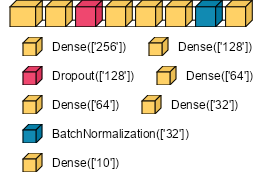

In [ ]:
font = ImageFont.truetype("usr/share/fonts/truetype/arial.ttf", 12)

visualkeras.layered_view(model_2, legend = True, show_dimension = True, font = font, to_file = 'Model 2 V1.png')

## **Using Convolutional Neural Networks**

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def cnn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1)))

    model.add(LeakyReLU(alpha = 0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(alpha = 0.1))

    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(alpha = 0.1))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    optimizer = Adam(0.001)

    model.compile(loss = categorical_crossentropy, optimizer = optimizer, metrics = ['accuracy'])

    return model

In [ ]:
# Build the model

cnn_model_1 = cnn_model_1()

In [ ]:
# Print the model summary

cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
# Fit the model

history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, verbose = 1, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 7s 4ms/step - loss: 1.1183 - accuracy: 0.6333 - val_loss: 0.6409 - val_accuracy: 0.8125
Epoch 2/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.5337 - accuracy: 0.8471 - val_loss: 0.5322 - val_accuracy: 0.8449
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4457 - accuracy: 0.8682 - val_loss: 0.5022 - val_accuracy: 0.8589
Epoch 4/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3825 - accuracy: 0.8868 - val_loss: 0.4590 - val_accuracy: 0.8701
Epoch 5/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3368 - accuracy: 0.8996 - val_loss: 0.4599 - val_accuracy: 0.8707
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2988 - accuracy: 0.9096 - val_loss: 0.4627 - val_accuracy: 0.8757
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2670 - accuracy: 0.9202 - val_loss: 0.4491 - val_accuracy:

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

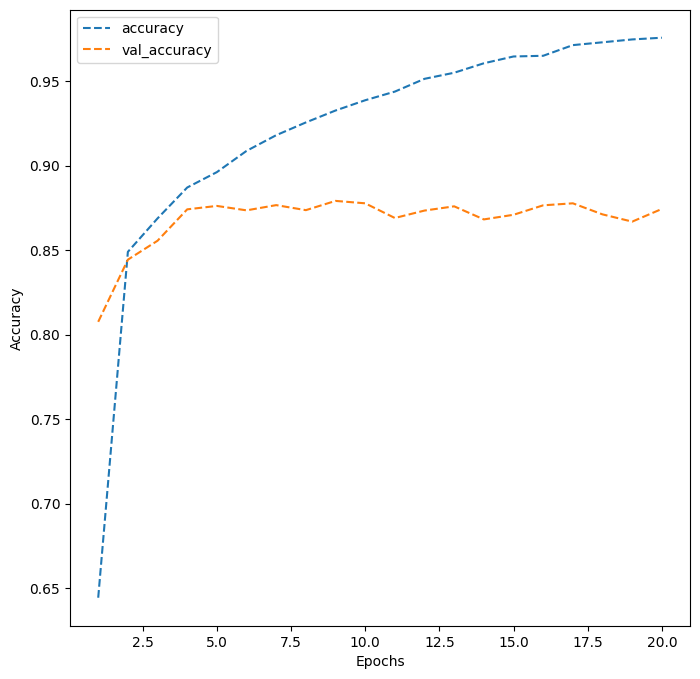

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: Overfitting - validation does not match train**

## Plotting Loss

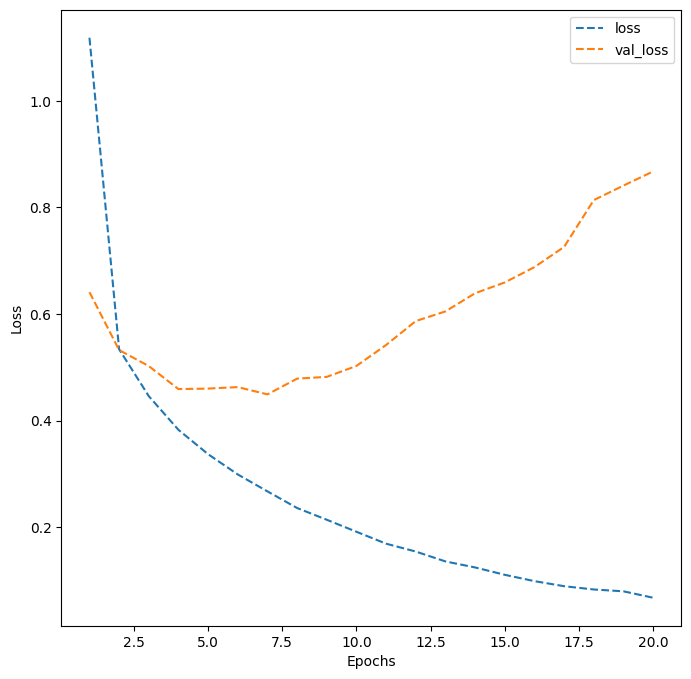

In [ ]:
dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, dict_hist['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## 20 Epoch CNN Vis

In [ ]:
!pip install Pillow
from PIL import ImageFont

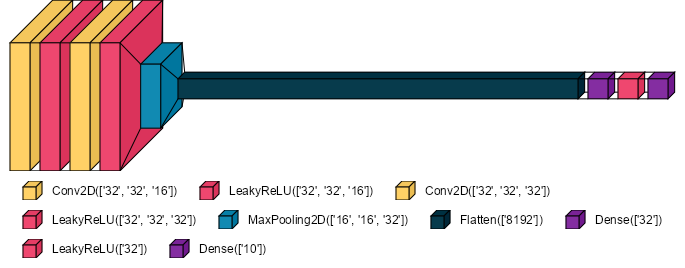

In [ ]:
font = ImageFont.truetype("usr/share/fonts/truetype/arial.ttf", 12)

visualkeras.layered_view(cnn_model_1, legend = True, show_dimension = True, font = font, to_file = 'CNN Model 1 V1.png')

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def cnn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), data_format = 'channels_last', padding = 'same', input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(2, 2))

    model.add(BatchNormalization())

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(2, 2))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, input_shape = (1024,)))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'softmax', input_shape = (1024,)))

    # Compile the model

    optimizer = Adam(0.001)

    model.compile(loss = categorical_crossentropy, optimizer = optimizer, metrics = ['accuracy'])

    return model

In [ ]:
# Build the model

cnn_model_2 = cnn_model_2()

In [ ]:
# Print the summary

cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the model

history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 [==============================] - 5s 9ms/step - loss: 1.2964 - accuracy: 0.5593 - val_loss: 1.8393 - val_accuracy: 0.3268
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 0.6566 - accuracy: 0.8001 - val_loss: 0.5203 - val_accuracy: 0.8627
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 0.5469 - accuracy: 0.8323 - val_loss: 0.4438 - val_accuracy: 0.8730
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 0.4889 - accuracy: 0.8498 - val_loss: 0.4123 - val_accuracy: 0.8825
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 0.4353 - accuracy: 0.8647 - val_loss: 0.4046 - val_accuracy: 0.8870
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 0.4046 - accuracy: 0.8760 - val_loss: 0.4026 - val_accuracy: 0.8843
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 0.3814 - accuracy: 0.8830 - val_loss: 0.4078 - val_accuracy: 0.8819
Epoch 

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot**

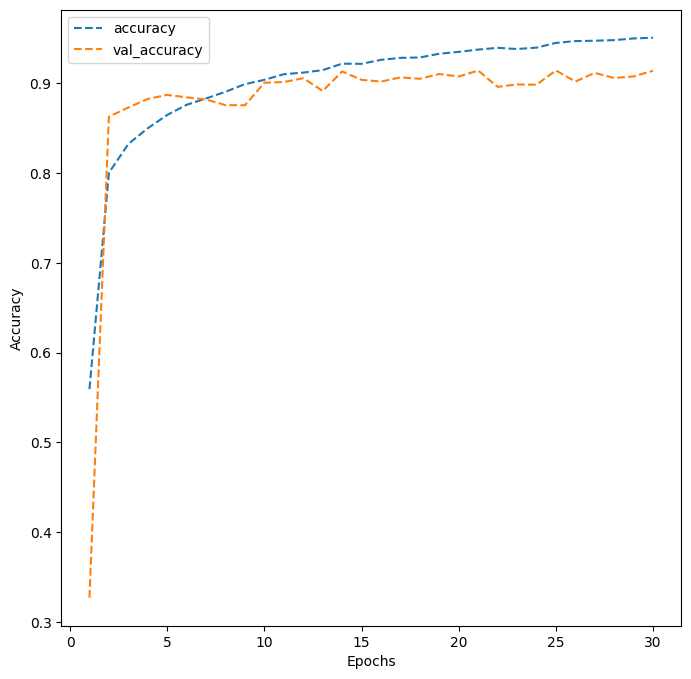

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: Steep increase in accuracy at start, with decreasing gains starting at epoch 3. validation did not exceed 90% accuracy while train reached nearly 95% - some overfitting, but still good overall. **

## Plotting Loss

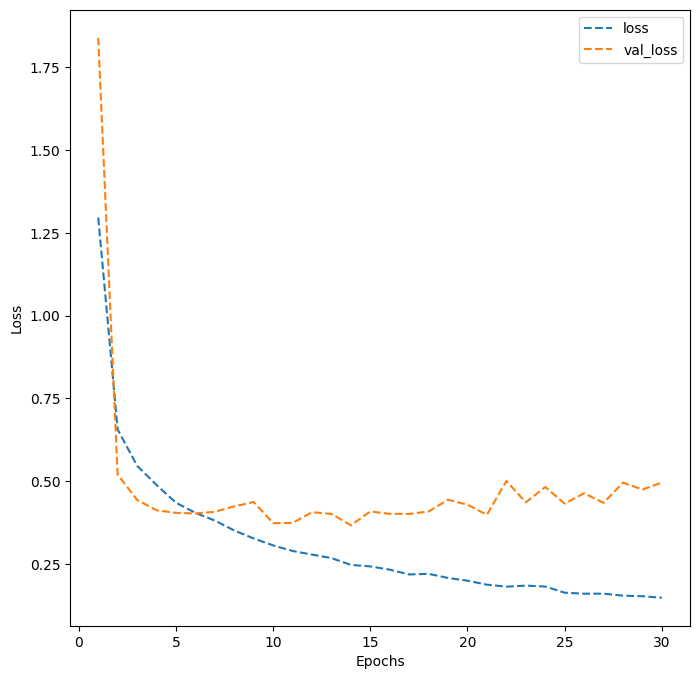

In [ ]:
# Plotting the loss

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, dict_hist['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1814
           1       0.91      0.91      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.91      0.87      0.89      1719
           4       0.93      0.93      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.90      0.91      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.91      0.89      0.90      1812
           9       0.89      0.92      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



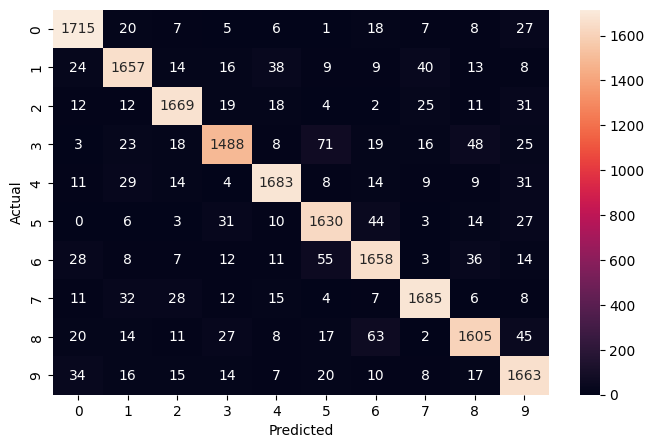

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations: Huge improvement in comparison to the previous model **

## 30 Epoch CNN Vis

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


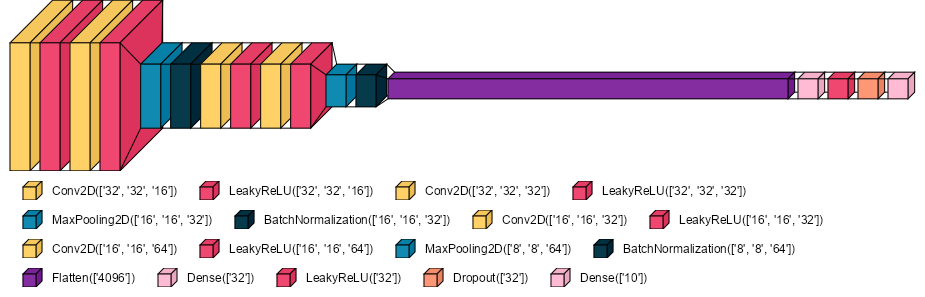

In [ ]:
font = ImageFont.truetype("usr/share/fonts/truetype/arial.ttf", 12)

visualkeras.layered_view(cnn_model_2, legend = True, show_dimension = True, font = font, to_file = 'CNN Model 2 V1.png')